<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/ANN_Ajuste_mar_2021/ANN_deploy_neural_network_mar_22_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
from sklearn.neural_network import MLPClassifier
import sklearn
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 7.6MB/s 


In [3]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [4]:
import mahotas.features.texture as mht
import mahotas.features

In [5]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 243 (delta 0), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (243/243), 600.05 KiB | 16.22 MiB/s, done.
Resolving deltas: 100% (137/137), done.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021


In [6]:
!ls

ANN_Ajuste_mar_2021
ANN_FIND_GRAIN_MAR_2021.py
ANN_FIND_GRAIN_NOVO.py
ANN_FIND_GRAIN_PAPER_STEP_02.py
big_segment.py
CNN_classify_grain_feb_15_2021.ipynb
CNN_DESCRIPTION.ipynb
CNN_FIND_GRAIN_PAPER_STEP_02.py
EPOCHS_graphic.csv
EPOCHS_graphic.txt
Fig_05_BIG_Segmentation_jan_25_2021.ipynb
GetBetterSegm.py
Get_PSDArea_New.py
Graphic_Epochs_fev_09_2020.ipynb
histogram_fev_2021.py
PSD_CNN_GRAIN_NOT_GRAIN_step_02_paper.ipynb
PSD_GRAIN_NOT_GRAIN_dez_04_2020.ipynb
PSD_GRAIN_NOT_GRAIN_fev_18_2021.ipynb
PSD_GRAIN_NOT_GRAIN_mar_11_2021.ipynb
PSD_GRAIN_NOT_GRAIN_mar_12_2021.ipynb
PSD_GRAIN_NOT_GRAIN_step_02_paper.ipynb
psd_mahotas.py
__pycache__
README.md


In [7]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 302 (delta 21), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (302/302), 115.75 MiB | 33.35 MiB/s, done.
Resolving deltas: 100% (138/138), done.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado


In [8]:
'''
# found drive
from google.colab import drive
drive.mount('drive')

#drive.mount('/content/gdrive')
'''

"\n# found drive\nfrom google.colab import drive\ndrive.mount('drive')\n\n#drive.mount('/content/gdrive')\n"

In [9]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [10]:
!git clone https://github.com/marquesgabi/Doutorado
# %cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
df=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [df, df_new]
  df= pd.concat(frames, ignore_index=True)

Cloning into 'Doutorado'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 302 (delta 21), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (302/302), 115.75 MiB | 32.93 MiB/s, done.
Resolving deltas: 100% (138/138), done.


In [11]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 243 (delta 0), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (243/243), 600.05 KiB | 9.84 MiB/s, done.
Resolving deltas: 100% (137/137), done.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021


In [12]:
from big_segment import Segmenta  # got image provided segmented
# from ANN_FIND_GRAIN_NOVO import AnnGrain  # got image provided segmented
from psd_mahotas import Mahotas

In [13]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021/ANN_Ajuste_mar_2021
%cd ANN_Ajuste_mar_2021

fatal: destination path 'ANN_Ajuste_mar_2021' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/ANN_Ajuste_mar_2021


In [14]:
from ANN_FIND_GRAIN_change_ann import AnnGrain  # got image provided segmented

In [15]:
!ls

ANN_deploy_neural_network_mar_19_2021.ipynb
ANN_FIND_GRAIN_change_ann.py
PSD_find_neural_network_mar_18_2021.ipynb
PSD_GRAIN_NOT_GRAIN_mar_18_2021.ipynb
__pycache__


In [16]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
ANN_dat=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [ANN_dat, df_new]
  ANN_dat= pd.concat(frames, ignore_index=True)

Cloning into 'Doutorado'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 302 (delta 21), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (302/302), 115.75 MiB | 33.18 MiB/s, done.
Resolving deltas: 100% (138/138), done.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/ANN_Ajuste_mar_2021/Doutorado


In [17]:
# open file to get df 
# use df and ANN to get grains and no grains
# use grains to obtain psd

In [18]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Cloning into 'Doutorado'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 302 (delta 21), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (302/302), 115.75 MiB | 33.92 MiB/s, done.
Resolving deltas: 100% (138/138), done.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/ANN_Ajuste_mar_2021/Doutorado/Doutorado


In [19]:
k=0
for Item in img_name:
  print(k,Item)
  k=k+1

foto_segmentada=ww[21]


0 Fotos_Grandes-3cdAmostra/Q6-8-4.jpg
1 Fotos_Grandes-3cdAmostra/Q6-5-3.jpg
2 Fotos_Grandes-3cdAmostra/Q6-7-4.jpg
3 Fotos_Grandes-3cdAmostra/Q6-8-2.jpg
4 Fotos_Grandes-3cdAmostra/Q6-3-2.jpg
5 Fotos_Grandes-3cdAmostra/Q6-7-2.jpg
6 Fotos_Grandes-3cdAmostra/Q6-4-4.jpg
7 Fotos_Grandes-3cdAmostra/Q6-9-5.jpg
8 Fotos_Grandes-3cdAmostra/Q6-2-5.jpg
9 Fotos_Grandes-3cdAmostra/Q6-8-3.jpg
10 Fotos_Grandes-3cdAmostra/Q6-9-3.jpg
11 Fotos_Grandes-3cdAmostra/Q6-1-2.jpg
12 Fotos_Grandes-3cdAmostra/Q6-6-3.jpg
13 Fotos_Grandes-3cdAmostra/Q6-3-4.jpg
14 Fotos_Grandes-3cdAmostra/Q6-1-4.jpg
15 Fotos_Grandes-3cdAmostra/Q6-6-2.jpg
16 Fotos_Grandes-3cdAmostra/Q6-4-3.jpg
17 Fotos_Grandes-3cdAmostra/Q6-7-3.jpg
18 Fotos_Grandes-3cdAmostra/Q6-2-2.jpg
19 Fotos_Grandes-3cdAmostra/Q6-9-2.jpg
20 Fotos_Grandes-3cdAmostra/Q6-1-5.jpg
21 Fotos_Grandes-3cdAmostra/Q6-6-5.jpg
22 Fotos_Grandes-3cdAmostra/Q6-2-1.jpg
23 Fotos_Grandes-3cdAmostra/Q6-5-2.jpg
24 Fotos_Grandes-3cdAmostra/Q6-4-1.jpg
25 Fotos_Grandes-3cdAmostra/Q6-3-1.

In [20]:
y_valor=df['Type']

quantidade= df.groupby('Type').size()

df_G = df[df["Type"] == "G"] 
Cut=['Unnamed: 0','Type','Width']
FotosG= df_G.drop(Cut,axis=1)


Size=28
img_G=[]

Num,cols=FotosG.shape
for i in range(Num):
  data=np.array(FotosG.iloc[i]).reshape(Size,Size)
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img_G.append(img28)

df_Z = df[df["Type"] == "Z"] 
Cut=['Unnamed: 0','Type','Width']
FotosZ= df_Z.drop(Cut,axis=1)

# We'll choose which is grain and withdraw from 750 segmented photos

Size=28
img_Z=[]

Num,cols=FotosZ.shape
for i in range(Num):
  data=np.array(FotosZ.iloc[i]).reshape(Size,Size)
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img_Z.append(img28)

GRAO=[0,146,149,166,217,222,223,257,268,286,455,482,538,612,644,647,651,677] # 0 ate 749
GRAO=np.array(GRAO)
Ind=FotosZ.index
FotosNG=FotosZ.copy()
for i in GRAO:
  FotosNG=FotosNG.drop(Ind[i])

PERCENT=245.0/(len(FotosNG.index))
FotosNG=FotosNG.sample(frac=PERCENT, replace=True)

rows,col=FotosG.shape
y_total=[] # grao-->zero, nao grao-->1
for i in range(rows):
  y_total.append(0) #  # grao-->zero
for i in range(rows,(2*rows)):
  y_total.append(1) #  # nao grao-->zero

frames = [FotosG,FotosNG]
result = pd.concat(frames)

#Define data train and data test

W_train, W_test, yw_train, yw_test = train_test_split(np.array(result), np.array(y_total), 
                                                      test_size=0.30, shuffle=True, 
                                                      random_state=42)

train_images=W_train #imagens utilizadas para o treino
train_labels=yw_train # resposta esperada para o treino
test_images=W_test
test_labels=yw_test


model = MLPClassifier(hidden_layer_sizes=(200,10), activation='relu', 
                      solver='adam',random_state=1, max_iter=300).fit(train_images,train_labels)
  
prediction = model.predict(test_images)
  
y_valor=np.copy(yw_test)
data = {'y_Actual': y_valor,'y_Predicted': prediction}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])


confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

y_true = df['y_Actual']
y_pred = df['y_Predicted']
  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)
  

Predicted   0   1
Actual           
0          72   0
1           0  75


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [21]:
joblib.dump(model,'model_ANN.pkl')

['model_ANN.pkl']

In [38]:
Arq = 'model_ANN.pkl'
from google.colab import files
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
# found drive
from google.colab import drive
#drive.mount('drive')
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [34]:
Path = '/content/gdrive/My Drive/ANNMariaGabriela'
Path = '/content/gdrive/My Drive/Colab_Notebooks'

In [35]:
# !cp  model_ANN.pkl  drive/My\ Drive/ANNMariaGabriela/
!cp  model_ANN.pkl  Path

In [25]:
#!cp RF_scaler.pkl drive/My\ Drive/Raianars_Paper_One_Revisited/

In [26]:
print(wxkxkk)
img = foto_segmentada
df=Segmenta(img)

In [27]:
#y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 

In [28]:
print(METRICS)
# grain class is number zero

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        75

    accuracy                           1.00       147
   macro avg       1.00      1.00      1.00       147
weighted avg       1.00      1.00      1.00       147



In [29]:
indice =[]
count = 0
for valor in y_pred:
  if(valor == 0):
    indice.append(count)
  count = count +1
print(indice)
print(len(indice))


[1, 6, 7, 9, 10, 11, 13, 15, 19, 20, 21, 23, 24, 25, 26, 30, 31, 34, 35, 36, 37, 38, 39, 43, 44, 45, 46, 51, 52, 54, 55, 57, 59, 62, 66, 71, 75, 78, 79, 84, 86, 87, 89, 90, 92, 95, 99, 103, 105, 108, 109, 110, 118, 120, 121, 122, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 138, 139, 142, 143, 144, 145]
72


In [30]:
del df['Width']
print(df)

           0           1           2    ...         781         782         783
0    99.326622   98.881500   90.685562  ...  206.095398  235.707123  178.804581
1     0.000000    0.000000    0.000000  ...  109.211243  107.773666  121.208496
2    17.554354    3.366685    4.290428  ...    1.000000    1.000000    1.000000
3    87.110725   86.557091   85.283737  ...   68.567474   69.148788   66.927338
4   122.714584  121.636055  122.828651  ...   45.042969   53.621243   60.348152
..         ...         ...         ...  ...         ...         ...         ...
45  121.482506  116.457474  110.019073  ...    1.976704    2.023296    2.000000
46   87.126381   86.343437   83.382309  ...  102.113632  164.503616  202.049789
47  142.209351  156.804169  168.833801  ...   67.745476   67.655556   59.522305
48   55.313629   66.851814   90.382278  ...   53.098000   55.695099   56.501293
49    5.064472   16.421125   17.880657  ...    0.000000    0.000000    0.000000

[150 rows x 784 columns]


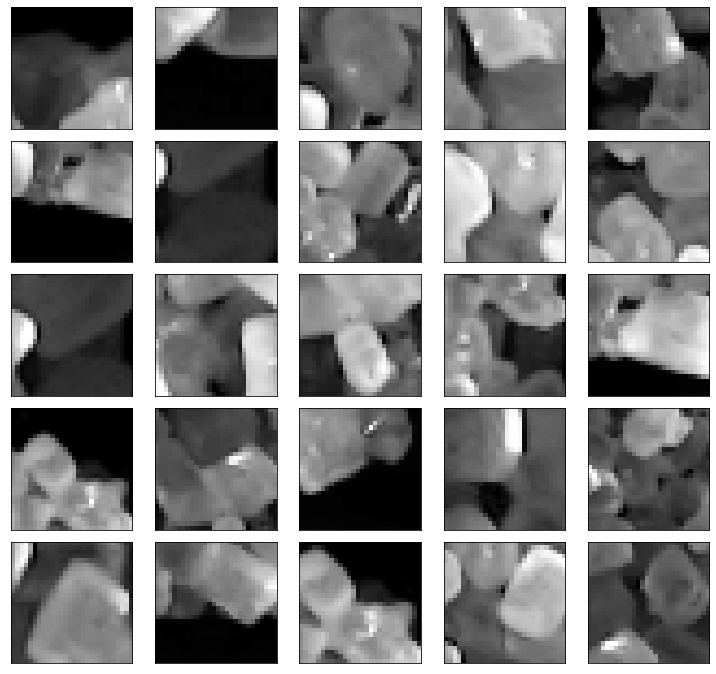

In [31]:

Num = 25
Size=28
Picture_Size = 25
fig = plt.gcf()
fig.set_size_inches(Picture_Size, Picture_Size)


for i in range(Num):
  ixx = indice[i]
  data=np.array(df.iloc[ixx,:]).reshape(Size,Size)
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)

  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  Foto=np.array(img28).reshape(28,28)
  plt.subplot(25,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Foto, cmap = "gray")
  #plt.xlabel(i)

plt.subplots_adjust(bottom=0.15,left=0.4, right=0.8, top=2,hspace=0.1, wspace=0.01)

In [32]:
indice

[1,
 6,
 7,
 9,
 10,
 11,
 13,
 15,
 19,
 20,
 21,
 23,
 24,
 25,
 26,
 30,
 31,
 34,
 35,
 36,
 37,
 38,
 39,
 43,
 44,
 45,
 46,
 51,
 52,
 54,
 55,
 57,
 59,
 62,
 66,
 71,
 75,
 78,
 79,
 84,
 86,
 87,
 89,
 90,
 92,
 95,
 99,
 103,
 105,
 108,
 109,
 110,
 118,
 120,
 121,
 122,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 134,
 135,
 138,
 139,
 142,
 143,
 144,
 145]

In [33]:
print(wzxz)

NameError: ignored

In [ ]:
# print(y_pred.ravel())

In [ ]:
Grain=[]; Ind=[]; Size=[]
k=0
for item in y_pred:
  if(item == 0):
    Ind.append(k)
  k=k+1

df = df.reset_index(drop=True)

df_size = df.drop(df.index[Ind])

Width=np.array(df_size['Width'])

# print(Width)

# print(df_size.shape)

In [ ]:
# pd.set_option('display.max_rows', None)
# print(df_size)

In [ ]:
df.head()

In [ ]:
Size=28
qual_img=64
L = Width[qual_img]
data=np.array(df_size.drop('Width',axis=1).iloc[qual_img]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)
img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")

In [ ]:
mean_value = np.mean(img)
img_new = img.copy()

In [ ]:
'''
for i in range(28):
  for j in range(28):
    if img[i,j] < mean_value:
      img_new[i,j] = 255
    else:
      img_new[i,j] = 0
'''
img28=cv2.resize(img_new,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")


In [ ]:
L = Width[qual_img]
Area = np.sum(img_new) / (255.0 * 28 * 28)* L*L
print(Area)

In [ ]:
Area_All, Diameter_All=PSDArea(df_size) 


In [ ]:
df_size.shape

In [ ]:
# print(Area_All)
print(Diameter_All)

In [ ]:
diam = Diameter_All.copy()
PSD_value, Perc_value = PSD(diam)
print(Perc_value)

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

In [ ]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [ ]:
PSD_new

In [ ]:
PSD_new, Perc_new = PSD(Diam1)  # imageJ
print(Perc_new)
print(Perc_value)

In [ ]:
np.sum(np.array(Perc_value))

In [ ]:
plt.plot( Perc_value,Perc_new )

In [ ]:
PSD_comparison = pd.DataFrame({ 'CNN':Perc_value,'ImgJ':Perc_new})
ax = PSD_comparison.plot.bar(rot=0)

In [ ]:
results = smf.ols('ImgJ ~ CNN', data=PSD_comparison).fit()
print(results.summary())

In [ ]:
#plt.plot(Diam)
plt.plot(Diameter_All)

In [ ]:
plt.plot(Diam1)

In [ ]:
df_diam=pd.DataFrame(Diam1)
df_diam.describe()

In [ ]:
plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])

In [ ]:
plt.hist(Diam1, alpha=0.5)
plt.hist(Diameter_All, alpha=0.5)